# Nelson-Siegel-Svensson Treasury Yield Curve Model with Security Analysis
**Author:** [Gregory Barco](https://barcogregory.com/)  
**Institution:** Brooklyn College, CUNY  
**Date:** June 2025

---

## Project Overview
Quantitative implementation of the Nelson-Siegel-Svensson (NSS) parametric model for US Treasury yield curve fitting and term structure analysis. This system optimizes six parameters (β₀, β₁, β₂, β₃, λ₁, λ₂) to generate smooth, continuous yield curves from discrete market data points obtained from the Bloomberg Terminal.

**Purpose:** Obtain interpolated yield curve rates for any duration from current day to 2055.

## Data Sources & Validation Period
- **US Bond Yields:** June 11, 2025 to June 2055 (30-year span) - Primary dataset for NSS parameter optimization **COMPLETE**
- **CBOE VIX Data:** January 1990 to June 11, 2025 (35+ years) - Market volatility context for yield spread analysis **IN DEVELOPMENT**
- **US Securities Dataset:** 1,000 individual Treasury bonds, notes, and bills - Model validation and accuracy testing **IN DEVELOPMENT**

### Current Key Features
- **Bloomberg Terminal Sourced Data** - Direct Excel import pipeline
- **Interactive Visualization** - Dynamic yield curves with mplcursors
- **Validation** - R², RMSE, and MAE optimization

## Development Roadmap
### Phase 1: Advanced Analytics (In Development)
- Bulk fixed-income securities analysis for mispriced bond identification
- Relative value screening against optimized NSS model
- Arbitrage opportunity detection

### Phase 2: Risk Management (Planned)
- Portfolio hedging strategies using optimized yield curve parameters
- Duration-based risk metrics and VaR calculations
- Stress testing for yield curve shifts

### Phase 3: Production Deployment (Future)
- Semi-Live market data integration 
- Forward testing against real-time market conditions

## Applications
- Fixed income portfolio management
- Yield curve trading strategies
- Risk management and hedging
- Academic research in term structure modeling
- Bond pricing and valuation

## Repository
**Code Repository:** [github.com/gregorybarco](https://github.com/gregorybarco)

---

*This analysis uses real market data up to June 11, 2025, and implements yield curve modeling for educational and research purposes in quantitative finance.*

---

## Analysis and code documentation begins here:

# Data Import and Validation Setup

## Overview
This cell initializes the data analysis environment by loading financial data from an Excel file containing US securities, bond yields, and VIX volatility data.

## Libraries Used
- `pandas`: Data manipulation and analysis
- `numpy`: Numerical computing
- `matplotlib.pyplot`: Plotting and visualization
- `scipy.optimize.fmin`: Optimization functions
- `mplcursors`: Interactive plot cursors

## Data Sources
The script loads data from `US_Data_Vix_Bonds_30YR.xlsx` containing three sheets:
- **US_Securities_SRC**: US securities market data
- **US_Bond_Yields**: Treasury bond yield data
- **Cboe_Vix_SRC**: CBOE VIX volatility index data

## Process Flow
1. **Environment Setup**: Displays current working directory and file locations
2. **File Search**: Checks current directory first, then searches common locations (Downloads, Desktop, Documents)
3. **Data Loading**: Loads each Excel sheet into separate pandas DataFrames
4. **Validation**: Verifies data integrity by checking:
   - DataFrame shapes (rows × columns)
   - Sample data preview
   - Empty DataFrame detection

## Output DataFrames
- `df1_US_Securities`: US securities data
- `df2_US_Bond_Yields`: Bond yield data  
- `df3_Cboe_Vix`: VIX volatility data

## Error Handling
Includes comprehensive error handling for:
- Missing files
- Empty datasets
- File path issues

**Note**: Ensure the Excel file is in the same directory as this notebook before running.
# Note please run the following line to import the packages in the jupyter environment. You may then need to restart the kernel and you may proceed!#


In [21]:
pip install pandas numpy matplotlib scipy openpyxl mplcursors --user

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # type: ignore
from scipy.optimize import fmin
import mplcursors


excel_file_name = "US_Data_Vix_Bonds_30YR.xlsx"
excel_subsheet1_name = "US_Securities_SRC"
excel_subsheet2_name = "US_Bond_Yields"
excel_subsheet3_name = "Cboe_Vix_SRC"

# Print current directory and verify file and format
print("Initializing environment\n")
print("Current working directory:", os.getcwd())
print("Excel file:", excel_file_name, "with sheets:", excel_subsheet1_name, ",", excel_subsheet2_name, ",", excel_subsheet3_name, "Should be in the same directory as this script\n")
print("Searching for US_Data_Vix_Bonds_30YR.xlsx\n")
print("All files in this directory:\n")
for file in os.listdir('.'):
    print(f"  - {file}")

dir_path = os.getcwd()
print(f"\nCurrent working directory: {dir_path}\n")

# Check current directory first
if os.path.exists(excel_file_name):
    print(f"✓ Found {excel_file_name} in the current directory")
else:
    # If script and data downloaded, then check these locations for the excel file that should be paired
    # Search in common locations
    search_paths = [
        os.path.expanduser("~/Downloads"),
        os.path.expanduser("~/Desktop"),
        os.path.expanduser("~/Documents")
    ]
    
    found_file = None
    for path in search_paths:
        full_path = os.path.join(path, excel_file_name)
        if os.path.exists(full_path):
            found_file = full_path
            break
    
    if found_file:
        print(f"Found {excel_file_name} at: {found_file}")
        print(f"Please move it to: {os.getcwd()}")
    else:
        print(f"❌ ERROR: {excel_file_name} not found!")
        print(f"Please make sure {excel_file_name} is in the same directory as your '{script_name}' notebook.")
        print(f"Current directory: {os.getcwd()}")

# Import file data check and display headers
try:
    print(f"Attempting to load the Excel file: {excel_file_name}\n")
    df1_US_Securities = pd.read_excel(excel_file_name, sheet_name=excel_subsheet1_name)
    print("\nSheet One: US Securities File loaded successfully!")
    print(f"Shape: {df1_US_Securities.shape}")
    print("\nFirst few rows:")
    print(df1_US_Securities.head())

    df2_US_Bond_Yields = pd.read_excel(excel_file_name, sheet_name=excel_subsheet2_name)
    print("\nSheet Two: US Bond Yields File loaded successfully!")
    print(f"Shape: {df2_US_Bond_Yields.shape}")
    print("\nFirst few rows:")
    print(df2_US_Bond_Yields.head())

    df3_Cboe_Vix = pd.read_excel(excel_file_name, sheet_name=excel_subsheet3_name)
    print("\nSheet Three: CBOE VIX File loaded successfully!")
    print(f"Shape: {df3_Cboe_Vix.shape}")
    print("\nFirst few rows:")
    print(df3_Cboe_Vix.head())
    
    # Check if the dataframes are empty
    if df1_US_Securities.empty or df2_US_Bond_Yields.empty or df3_Cboe_Vix.empty:
        raise ValueError("One or more dataframes are empty. Please check the Excel file contents.")
    print("\nAll correct data structures and tabs found. The program will now proceed.\n")

except FileNotFoundError as event_file_not_found:
    print(f"Error: {event_file_not_found}")
    print("Make sure the Excel file named US_Data_Vix_Bonds_30YR.xlsx is in the same folder as this Python script")
    print("This script is running in the current directory, so please check the path.")

# File import complete

Initializing environment

Current working directory: C:\Users\Grego\Desktop\OneDrive\Blackrock - Bloomberg Project\jupyter_us_treasury
Excel file: US_Data_Vix_Bonds_30YR.xlsx with sheets: US_Securities_SRC , US_Bond_Yields , Cboe_Vix_SRC Should be in the same directory as this script

Searching for US_Data_Vix_Bonds_30YR.xlsx

All files in this directory:

  - .ipynb_checkpoints
  - US_Data_Vix_Bonds_30YR.xlsx
  - us_fixed_income_yield_curve.ipynb

Current working directory: C:\Users\Grego\Desktop\OneDrive\Blackrock - Bloomberg Project\jupyter_us_treasury

✓ Found US_Data_Vix_Bonds_30YR.xlsx in the current directory
Attempting to load the Excel file: US_Data_Vix_Bonds_30YR.xlsx


Sheet One: US Securities File loaded successfully!
Shape: (1000, 11)

First few rows:
                               Name Ticker Coupon   Maturity Maturity Type  \
0  United States Treasury Note/Bond      T   4.25 2035-05-15        NORMAL   
1  United States Treasury Note/Bond      T   4.75 2055-05-15        N

# Data Retrieval Functions

## Row Access Functions
- `retrieve_row_security_data(i)`: Gets row `i` from US securities data
- `retrieve_row_us_bond_yield_data(i)`: Gets row `i` from bond yields data  
- `retrieve_row_vix_data(i)`: Gets row `i` from VIX data

*Note: Row indexing starts at 0*

## Column Extraction
- `retrieve_column_us_bond_yield_data()`: Extracts time-to-expiry and yield columns from bond data
- Creates `df4_extracted_yield_data` for N-S-S parameter calculations

## Output
Displays the extracted bond yield data that will be used for analysis.

In [23]:
# Function definitions for retrieving row data from the dataframes
def retrieve_row_security_data(i):
    """
    Call the US SECURITY df, starting at 0th entry: the first row.
    Data retrieved from the bloomberg terminal is a list of the US treasuries.

    :param i: the i'th row of the entries. starts at 0 for info about of bond i
    :return: the info about bond entry i
    """
    return df1_US_Securities.iloc[i]


def retrieve_row_us_bond_yield_data(i):
    """
    Call the bond yield df, pass the param i to the df starting at 0th entry being the first row.
    bond yield is the expiry dates of the bonds pulled from Bloomberg terminal in the exact format given
    :param i: starting at 0, this is the entry number. the df is sorted by historical date
    :return:the row of requested bond yield entry
    """
    return df2_US_Bond_Yields.iloc[i]


def retrieve_row_vix_data(i):
    """
    Call the vix data dataframe(df), pass the param i to the df
    :param i: starting at 0, this is the entry number. the df is sorted by historical date
    :return: the row of requested historical entry
    """
    return df3_Cboe_Vix.iloc[i]


def retrieve_column_us_bond_yield_data():
    time_to_expiry_column = df2_US_Bond_Yields.iloc[:, 0]  # Assuming the first column contains the time to expiry
    yield_column = df2_US_Bond_Yields.iloc[:, 4]  # Assuming the fourth column contains the yield values (If downloaded from Bloomberg Terminal, this is the standard format for yield)
    df4_extracted_yield_data = pd.DataFrame({
        'Time to Expiry': time_to_expiry_column,
        'Yield': yield_column
    })
    return df4_extracted_yield_data

    
# Show the extracted data
print("Extracted US Bond Yield Data. This is what will be used to calculate the N-S-S Parameters:")
df4_extracted_yield_data = retrieve_column_us_bond_yield_data()
print(df4_extracted_yield_data)

Extracted US Bond Yield Data. This is what will be used to calculate the N-S-S Parameters:
    Time to Expiry   Yield
0         0.083333  4.2458
1         0.125000  4.2691
2         0.166667  4.3405
3         0.250000  4.3584
4         0.333333  4.3342
5         0.500000  4.2938
6         1.000000  4.0737
7         2.000000  3.9536
8         3.000000  3.9182
9         5.000000  4.0216
10        7.000000  4.2109
11       10.000000  4.4223
12       20.000000  4.9308
13       30.000000  4.9187


# Nelson-Siegel-Svensson Yield Curve Model

## Overview
Implements the Nelson-Siegel-Svensson (NSS) model to fit yield curves and optimize parameters.

## Initial Parameters
- `t`: Time to expiry values from bond data
- `β0, β1, β2, β3`: Yield curve shape parameters (initialized to 0.01)
- `λ1, λ2`: Decay factors (initialized to 1.0)

## Core Function
### `nelson_siegel_svensson(t, β0, β1, β2, β3, λ1, λ2)`
Calculates theoretical yields using the NSS formula.

## Data Processing
1. **Calculate initial yields** using default parameters
2. **Create comparison DataFrame** with actual vs NSS yields
3. **Calculate residuals** (squared differences between actual and fitted yields)
4. **Compute sum of squared residuals (SSR)** for optimization

## Parameter Optimization
### `optimize_nss_parameters(df_data)`
- Uses `fmin` to minimize sum of squared residuals
- Finds optimal β and λ parameters
- Returns optimized parameter values

## Output
- Displays optimized parameters with 10 decimal precision
- Shows final SSR value
- Calculates optimized yield curve using optimized parameters

In [24]:
# Create the parameter values and a dataframe for the Nelson-Siegel-Svensson formula
# t sourced from the time to expiry column in the df4_extracted_yield_data dataframe
t = df4_extracted_yield_data['Time to Expiry'].values  # Extract
β0 = 0.0  # Long-term yield
β1 = 0.0  # Short-term yield
β2 = 0.0  # Medium-term yield
β3 = 0.0  # Long-term yield adjustment
λ1 = 1.0  # Short-term decay factor
λ2 = 1.0  # Long-term decay factor

def nelson_siegel_svensson(t, β0, β1, β2, β3, λ1, λ2):
    """
    Calculate the Nelson-Siegel-Svensson yield for a given time to maturity.
    
    :param t: Time to maturity in years
    :param β0: Long-term yield
    :param β1: Short-term yield
    :param β2: Medium-term yield
    :param β3: Long-term yield adjustment
    :param λ1: Short-term decay factor
    :param λ2: Long-term decay factor
    :return: Yield according to the Nelson-Siegel-Svensson model
    """
    return (β0 + 
            β1 * (1 - np.exp(-t / λ1)) / (t / λ1) + 
            β2 * ((1 - np.exp(-t / λ1)) / (t / λ1) - np.exp(-t / λ1)) + 
            β3 * ((1 - np.exp(-t / λ2)) / (t / λ2) - np.exp(-t / λ2)))

# Calculate the yields using the Nelson-Siegel-Svensson model
yields_nss = nelson_siegel_svensson(t, β0, β1, β2, β3, λ1, λ2)

# Create a DataFrame for the calculated yields
df_nss_yields_yield_time_to_expiry = pd.DataFrame({
    'Time to Expiry': t,
    'Yield': df4_extracted_yield_data['Yield'],
    'Yield NSS': yields_nss
})  

# Create a dataframe for the calculations of the differences between the (original yields and the NSS yields) squared.
df_residual = (df_nss_yields_yield_time_to_expiry['Yield'] - df_nss_yields_yield_time_to_expiry['Yield NSS']) ** 2
# Append the residuals to the original DataFrame
df_nss_yields_yield_time_to_expiry['Residuals'] = df_residual

df_nss_model = pd.DataFrame({
    'Time to Expiry (Years)': df_nss_yields_yield_time_to_expiry['Time to Expiry'],
    'Yield (%)': df_nss_yields_yield_time_to_expiry['Yield'],
    'Yield NSS (%)': df_nss_yields_yield_time_to_expiry['Yield NSS'],
    'Squared Residuals': df_nss_yields_yield_time_to_expiry['Residuals']
}) 

np.sum_squared_residuals = np.sum(df_nss_model['Squared Residuals'])

# The next step is to optimize the parameters minimizing the SSR.
# Creating an array of initial guesses for the parameters, then allowing the fmin function to optimize the parameters.
# The array must also contain the return value of the minimized SSR.

def optimize_nss_parameters(df_data):
    """
    Optimize N-S-S parameters by minimizing sum of squared residuals.
    :param df_data: DataFrame containing 'Time to Expiry' and 'Yield' columns"""
    
    def objective(params):

        β0, β1, β2, β3, λ1, λ2 = params
        t = df4_extracted_yield_data['Time to Expiry'].values  # This extracts numpy array
        nss_yields = nelson_siegel_svensson(t, β0, β1, β2, β3, λ1, λ2)
        ssr = np.sum((df_data['Yield'] - nss_yields) ** 2)
        return ssr
    
    return fmin(objective, [0.01, 0.01, 0.01, 0.1, 1.1, 1.1])

# Use the function to optimize the parameters
print("\nOptimizing NSS parameters...")
optimized_params = optimize_nss_parameters(df4_extracted_yield_data)
β0, β1, β2, β3, λ1, λ2 = optimized_params

# Calculate optimized yields
t = df4_extracted_yield_data['Time to Expiry']
optimized_yields = nelson_siegel_svensson(t, β0, β1, β2, β3, λ1, λ2)

print(f"\nOptimized Parameters: β0={β0:.10f}, β1={β1:.10f}, β2={β2:.10f}, β3={β3:.10f}, λ1={λ1:.10f}, λ2={λ2:.10f}")
print(f"Final SSR: {np.sum((df4_extracted_yield_data['Yield'] - optimized_yields) ** 2):.6f}")


Optimizing NSS parameters...


C:\Users\Grego\AppData\Local\Temp\ipykernel_39652\618056468.py:27: RuntimeWarning: overflow encountered in exp
  β3 * ((1 - np.exp(-t / λ2)) / (t / λ2) - np.exp(-t / λ2)))
C:\Users\Grego\AppData\Local\Temp\ipykernel_39652\618056468.py:27: RuntimeWarning: invalid value encountered in subtract
  β3 * ((1 - np.exp(-t / λ2)) / (t / λ2) - np.exp(-t / λ2)))



Optimized Parameters: β0=1.4996912734, β1=2.8590261303, β2=-4.4936739940, β3=12.7261754771, λ1=4.4555889901, λ2=11.9849653076
Final SSR: 0.038842


C:\Users\Grego\AppData\Local\Temp\ipykernel_39652\618056468.py:70: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  return fmin(objective, [0.01, 0.01, 0.01, 0.1, 1.1, 1.1])


# Optimized NSS Curve Generation

## Function: `create_optimized_nss_curve(df_data, num_points=1000)`
Creates a smooth yield curve of the desired number of points: num_points using optimized NSS parameters.

### Parameters
- `df_data`: Input DataFrame with time to expiry and yield data
- `num_points`: Number of points for smooth curve (default: 1000)

### Process
1. **Find time range** from minimum to maximum maturity in data
2. **Generate evenly spaced points** using `np.linspace()`
3. **Calculate NSS yields** at all points using optimized parameters
4. **Return smooth curve** as DataFrame

### Output
- `df_optimized_nss_curve`: DataFrame with smooth yield curve data
- Contains 1000 points between shortest and longest maturity
- Used for plotting continuous yield curve

In [25]:

def create_optimized_nss_curve(df_data, num_points=1000):
    """
    Create an optimized NSS yield curve with many points.
    
    :param df_data: DataFrame containing 'Time to Expiry' and 'Yield' columns
    :param num_points: Number of points to generate for the NSS curve
    :return: DataFrame with optimized NSS yields at many points
    """
    t_min = df_data['Time to Expiry'].min()
    t_max = df_data['Time to Expiry'].max()
    t_values = np.linspace(t_min, t_max, num_points)
    
    optimized_yields = nelson_siegel_svensson(t_values, β0, β1, β2, β3, λ1, λ2)
    
    return pd.DataFrame({
        'Time to Expiry': t_values,
        'Yield NSS Optimized': optimized_yields
    })

df_optimized_nss_curve = create_optimized_nss_curve(df4_extracted_yield_data)


# Model Performance Metrics

## Evaluation Functions

### `calculate_r_squared(df_data, optimized_params)`
- **Purpose**: Measures how well the NSS model fits the data
- **Formula**: R² = 1 - (residual sum of squares / total sum of squares)
- **Range**: 0 to 1 (higher = better fit to the data observed ~*bond yields obtained from the terminal*)

### `calculate_rmse(df_data, optimized_params)`
- **Purpose**: Root Mean Square Error - average prediction error
- **Formula**: √(mean of squared differences)
- **Units**: Same as yield (percentage points)

### `calculate_mae(df_data, optimized_params)`
- **Purpose**: Mean Absolute Error - average absolute prediction error
- **Formula**: Mean of absolute differences
- **Units**: Same as yield (percentage points)

## Output
1. **Performance metrics** for optimized NSS model
2. **Comparison table** showing:
  - Time to expiry
  - Actual yields vs NSS predicted yields
  - Prediction errors
3. **Validation link** to US Treasury website for current yield verification

## Key Point
All metrics use the same time points as original data for accurate comparison.

In [26]:
# Calculate r squared
def calculate_r_squared(df_data, optimized_params):
    """
    Calculate R-squared using the same time points for both actual and predicted values.
    """
    β0, β1, β2, β3, λ1, λ2 = optimized_params
    
    # Get actual yields at the original data points
    y_actual = df_data['Yield'].values
    
    # Calculate predicted yields at the SAME time points as the original data
    t_values = df_data['Time to Expiry'].values
    y_predicted = nelson_siegel_svensson(t_values, β0, β1, β2, β3, λ1, λ2)
    
    # Calculate R-squared 
    ss_res = np.sum((y_actual - y_predicted) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    
    return r_squared

# RMSE and MAE functions  to use the same time points for both actual and predicted values
def calculate_rmse(df_data, optimized_params):
    """
    Calculate RMSE at the original data points
    """
    
    β0, β1, β2, β3, λ1, λ2 = optimized_params
    t_values = df_data['Time to Expiry'].values
    y_actual = df_data['Yield'].values
    y_predicted = nelson_siegel_svensson(t_values, β0, β1, β2, β3, λ1, λ2)
    rmse = np.sqrt(np.mean((y_actual - y_predicted) ** 2))
    return rmse

def calculate_mae(df_data, optimized_params):
    """
    Calculate MAE at the original data points
    """

    β0, β1, β2, β3, λ1, λ2 = optimized_params
    t_values = df_data['Time to Expiry'].values
    y_actual = df_data['Yield'].values
    y_predicted = nelson_siegel_svensson(t_values, β0, β1, β2, β3, λ1, λ2)
    mae = np.mean(np.abs(y_actual - y_predicted))
    return mae

# Print out the metrics given the optimized parameters
print("\nFINAL OPTIMIZED METRICS")
r_squared = calculate_r_squared(df4_extracted_yield_data, optimized_params)
rmse = calculate_rmse(df4_extracted_yield_data, optimized_params)
mae = calculate_mae(df4_extracted_yield_data, optimized_params)

print(f"Parameter Optimized R-squared: {r_squared:.10f}")
print(f"Parameter Optimized RMSE: {rmse:.10f}")
print(f"Parameter Optimized MAE: {mae:.10f}")

# Show the comparison
print("\nDATA COMPARISON")
t_values = df4_extracted_yield_data['Time to Expiry'].values
y_actual = df4_extracted_yield_data['Yield'].values
y_predicted = nelson_siegel_svensson(t_values, β0, β1, β2, β3, λ1, λ2)

comparison_df = pd.DataFrame({
    'Time to Expiry in years': t_values,
    'Actual Yield': y_actual,
    'NSS Predicted yield': y_predicted,
    'Error': y_actual - y_predicted
})
print(comparison_df)
print("Visit the US Treasury website to valiadate the current days predicted yield against this interpolation")
print("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2025")


FINAL OPTIMIZED METRICS
Parameter Optimized R-squared: 0.9678364342
Parameter Optimized RMSE: 0.0526726084
Parameter Optimized MAE: 0.0483276524

DATA COMPARISON
    Time to Expiry in years  Actual Yield  NSS Predicted yield     Error
0                  0.083333        4.2458             4.334683 -0.088883
1                  0.125000        4.2691             4.323023 -0.053923
2                  0.166667        4.3405             4.311597  0.028903
3                  0.250000        4.3584             4.289436  0.068964
4                  0.333333        4.3342             4.268178  0.066022
5                  0.500000        4.2938             4.228283  0.065517
6                  1.000000        4.0737             4.128080 -0.054380
7                  2.000000        3.9536             4.001980 -0.048380
8                  3.000000        3.9182             3.952313 -0.034113
9                  5.000000        4.0216             4.000256  0.021344
10                 7.000000       

# Interactive NSS Yield Curve Visualization

## Function: `plot_optimized_nss_curve_with_interactive_cursor(df_optimized_nss_curve, df_data)`

### Purpose
Creates an interactive plot comparing the fitted NSS yield curve with original data points.

### Plot Elements
- **Red line**: Smooth optimized NSS yield curve (1000 points)
- **Blue dots**: Original yield data points from bond data
- **Interactive cursor**: Hover to see exact values at any point *ran locally on your device only*

### Features
- **Grid**: Enabled for easy reading
- **Legend**: Identifies curve vs data points
- **Labels**: Time to expiry (years) and yield (%)

### Usage
Displays the quality of NSS model fit and allows precise value inspection at any point on the curve.


Plotting the Optimized NSS Yield Curve with Interactive Cursor. This works only if you run this program locally.
The code and excel will be available on my github

Code Repository available online at https://github.com/gregorybarco


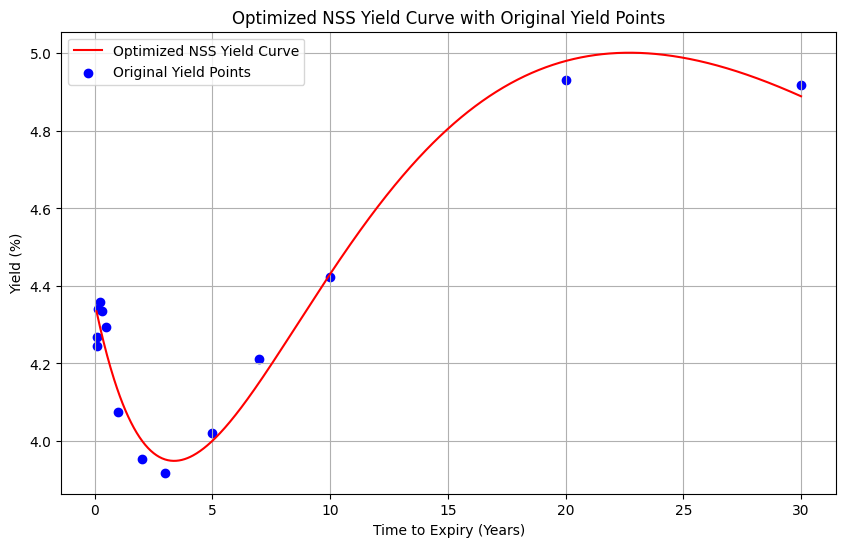

In [27]:
if mplcursors:
    def plot_optimized_nss_curve_with_interactive_cursor(df_optimized_nss_curve, df_data):
        """
        Plot the optimized NSS curve with an interactive cursor.
        
        :param df_optimized_nss_curve: DataFrame containing 'Time to Expiry' and 'Yield NSS Optimized' columns
        :param df_data: DataFrame containing 'Time to Expiry' and 'Yield' columns
        """
        plt.figure(figsize=(10, 6))
        plt.plot(df_optimized_nss_curve['Time to Expiry'], df_optimized_nss_curve['Yield NSS Optimized'], color='r', label='Optimized NSS Yield Curve')
        plt.scatter(df_data['Time to Expiry'], df_data['Yield'], color='b', label='Original Yield Points')
        plt.title('Optimized NSS Yield Curve with Original Yield Points')
        plt.xlabel('Time to Expiry (Years)')
        plt.ylabel('Yield (%)')
        plt.legend()
        plt.grid(True)
        
        # Enable interactive cursor
        mplcursors.cursor(hover=True)
        
        plt.show()

    # Call the interactive plot function
    print("\nPlotting the Optimized NSS Yield Curve with Interactive Cursor. This works only if you run this program locally.\nThe code and excel will be available on my github\n")
    print("Code Repository available online at https://github.com/gregorybarco")
    plot_optimized_nss_curve_with_interactive_cursor(df_optimized_nss_curve, df4_extracted_yield_data)
else:
    print("Interactive cursor functionality is not available. Please install mplcursors to enable this feature.")

# Since we are unable to interact with the plot, you can use the following function to retrieve the yield. Just input the time in years and the function will output the yield. #

In [28]:
# Quick yield lookup function
def quick_yield_lookup(maturity_years):
    """Quick lookup for yield at specific maturity"""
    yield_value = nelson_siegel_svensson(maturity_years, β0, β1, β2, β3, λ1, λ2)
    print(f"NSS Treasury Interpolated Yield at {maturity_years:.2f} years: {yield_value:.3f}%")
    return yield_value.item()

# Examples:
#quick_yield_lookup(4.698984698561)   # 1-year yield
#quick_yield_lookup(25.0)   # 25-year yield

In [29]:
quick_yield_lookup(30.0)  # 30-year yield

NSS Treasury Interpolated Yield at 30.00 years: 4.889%


4.88926852827607

This is the current development of this project.   
The other features are in development.   
Feel free to contact me if you have any questions, comments, or improvements!


# **Contact:** Gregory Barco | Brooklyn College, CUNY | Applied & Financial Mathematics,   
**Portfolio:** [barcogregory.com](https://barcogregory.com) | **Email:** Greg@barcogregory.com   
**Code Repository:** Available online at [github.com/gregorybarco](https://github.com/gregorybarco)   